In [1]:
from dlc_lib import DlcDataset
ds = DlcDataset(linearize=True, data_root='D:\\datasets\\dlc\\current')

Using data in D:\datasets\dlc\current


In [2]:
len(ds)

43635

In [3]:
ds[3]

(array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
 array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
 0,
 array([ 0.35968485,  0.46526006,  0.53782076, ...,  0.53782076,
         0.46526006,  0.35968485], dtype=float32))

In [4]:
import tensorwatch as tw

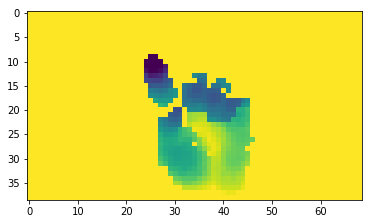

In [5]:
tw.show_image(ds[3][1], (39, 69))

In [6]:
import heapq
import scipy.spatial.distance

In [7]:
def col2array(dataset, col):
    return [row[col] for row in dataset]

def search_similar(inputs, compare_to, algorithm='euclidean', topk=5):
    all_scores = scipy.spatial.distance.cdist(inputs, compare_to, algorithm)
    all_results = []
    for input, scores in zip(inputs, all_scores):
        result = []
        for i, (score, data) in enumerate(zip(scores, compare_to)):
            score = 1/(score + 1.0E-6)
            if len(result) < topk:
                heapq.heappush(result, (score, (i, input, data)))
            else:
                heapq.heappushpop(result, (score, (i, input, data)))
        all_results.append(result)
    return all_results

In [8]:
cap_imgs = col2array(ds, 0)

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import numpy as np
import math

def linear_to_2d(img, size=None):
    if size is not None or (hasattr(img, 'shape') and len(img.shape) == 1):
        if size is None:
            # make guess for 1-dim tensors
            h = int(math.sqrt(img.shape[0]))
            w = int(img.shape[0] / h)
            size = h,w
        img = np.reshape(img, size)
    return img

def stack_images(imgs):
    return np.hstack(imgs)

def show_image(img, size=None):
    if size is not None or (hasattr(img, 'shape') and len(img.shape) == 1):
        if size is None:
            # make guess for 1-dim tensors
            h = int(math.sqrt(img.shape[0]))
            w = int(img.shape[0] / h)
            size = h,w
        img = np.reshape(img, size)
    fig = plt.Figure()
    ax = fig.add_subplot(111)
    ax.imshow(img)
    return plt.show()

In [10]:
imgs = [linear_to_2d(img, (39, 69)) for img in [ds[0][1], ds[3][1]]]
imgs = stack_images(imgs)
show_image(imgs)

In [11]:
results = search_similar([ds[3][0]], cap_imgs, topk=10)

In [12]:
results

[[(0.15557890333428437,
   (12250,
    array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
    array([ 1.        ,  1.        ,  0.88050663, ...,  1.        ,
            1.        ,  1.        ], dtype=float32))),
  (0.16028412544109186,
   (198,
    array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
    array([ 1.        ,  1.        ,  0.83748621, ...,  1.        ,
            1.        ,  0.96654737], dtype=float32))),
  (0.16028412544109186,
   (199,
    array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
    array([ 1.        ,  1.        ,  0.83748621, ...,  1.        ,
            1.        ,  0.96654737], dtype=float32))),
  (0.19155104768369732,
   (11253,
    array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
    array([ 1.        ,  1.        ,  0.96654737, ...,  1.        ,
            1.        ,  1.        ], dtype=float32))),
  (0.2111349835851894,
   (2206,
    array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32),
    array([ 1.      

In [24]:
img_plot_data = [(linear_to_2d(input, (39, 69)), str(score), linear_to_2d(ds[i][1], (39, 69))) for score, (i, input, data) in results[0]]

In [14]:
img_plot_data[0][2].shape

(39, 69)

In [15]:
img_plot = tw.open(img_plot_data, type='image', rows=2, cols=5)
img_plot.show()

<Figure size 576x216 with 0 Axes>

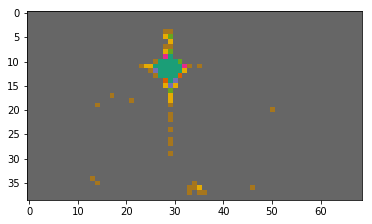

In [25]:
plt.imshow(img_plot_data[7][0])

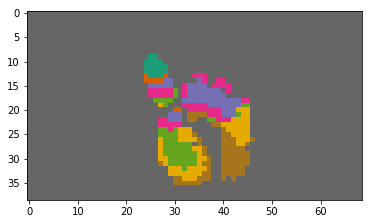

In [26]:
plt.imshow(img_plot_data[7][2])

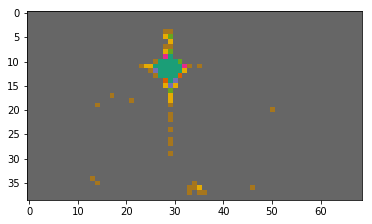

In [27]:
plt.imshow(img_plot_data[9][0])

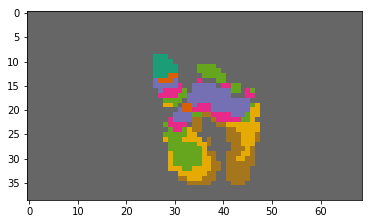

In [28]:
plt.imshow(img_plot_data[9][2])